## Importing libraries :

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


## Importing Data:

In [0]:
#!pip install xmltodict

import requests, zipfile, io

r = requests.get('https://storage.googleapis.com/kaggle-competitions-data/kaggle/3004/all.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1574357118&Signature=b9xyOErfHWi0jGf87HdYIWcMFyDFcMQ22%2Fbs9BzoAqPJtf%2B1FhOI7HM8eK0qSSrCgv9%2FI44TxMcZ2MITuHbQPRbB%2Ft3peKudwmRGPSdf3YZl1OxxZDy6KIjA11i%2FvPtnh8ezXYpE%2B%2F%2B85jW2qQSqX8FeYae49SRmHa1kByJragqk%2BxbXLicbRYzDZ90VF4mcsn%2BPaRDotrVuAj2Js%2BuPRJqiohu5nYhL9pAwrEGxE%2B6r5vw10tnhNRwF1HaQsLyNFZfOyP4NjKSnn1qIS7Ux9QPXxWZYvLF9otPfojUcKYTXPp4UR%2BmKOXNdzLuL2YF%2BRexUGNoNrsdWU3%2FD4IY1Gg%3D%3D&response-content-disposition=attachment%3B+filename%3Ddigit-recognizer.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [5]:
data=pd.read_csv('/content/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
data.shape

## Reshaping & Normalizing the images :

In [0]:
train, test = train_test_split(data, test_size=0.10, random_state=3)
X = (train.drop("label", axis=1)/255.0).values.reshape(-1,28,28,1)
Y = train["label"].to_numpy()
X_test=(test.drop("label", axis=1)/255.0).values.reshape(-1,28,28,1)
Y_test=test["label"].to_numpy()

##Data augmentation :

In [13]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X)

Using TensorFlow backend.


## Defining the model :

In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


## Training :

In [17]:
history = model.fit_generator(datagen.flow(X,Y, batch_size=1000),
                              epochs = 6, validation_data = (X_test ,Y_test))

Epoch 1/6
37/38 [============================>.] - ETA: 5s - loss: 0.0671 - acc: 0.9804 Epoch 1/6
4200/38 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

##Plotting Loss and acc evolution : 

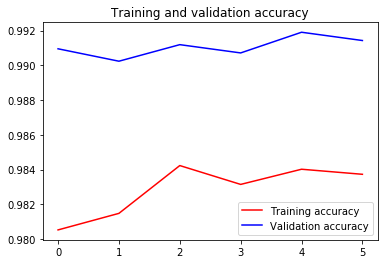

<Figure size 432x288 with 0 Axes>

In [18]:


import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

## Make the Prediction :

In [0]:
Submission_data=pd.read_csv('/content/test.csv').to_numpy().reshape(-1,28,28,1)
Submission_file=pd.read_csv('/content/sample_submission.csv')

In [0]:
submission_result = model.predict(Submission_data)

In [0]:
submission_final=[]
for i in range(28000):
  for j in range(10):
    if submission_result[i][j]==1.0:
      submission_final.append(j)
      break
    if j==9 and submission_result[i][j]!=1.0:
      submission_final.append(0)

In [0]:
submission_final=np.array(submission_final)

In [23]:
submission_final.shape

(28000,)

In [0]:
Submission_file['Label']=submission_final

In [25]:
Submission_file

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [0]:
Submission_file.to_csv("submission_final.csv", index=False) #Convert DataFrame to .csv file


In [0]:
model.save_weights('digit_recog_weights')
model.save('digit_recog_model.h5')
